In [125]:
import os
import numpy as np
import pandas as pd

In [126]:
train_corona_dir="D:/c/Desktop/PIAIC/Models/dataset/Copy of covid_data/train/corona"
train_normal_dir="D:/c/Desktop/PIAIC/Models/dataset/Copy of covid_data/train/normal"
valid_corona_dir="D:/c/Desktop/PIAIC/Models/dataset/Copy of covid_data/val/corona"
valid_normal_dir="D:/c/Desktop/PIAIC/Models/dataset/Copy of covid_data/val/normal"
test_corona_dir="D:/c/Desktop/PIAIC/Models/dataset/Copy of covid_data/test/corona"
test_normal_dir="D:/c/Desktop/PIAIC/Models/dataset/Copy of covid_data/test/normal"


In [127]:
print('total training corona images:', len(os.listdir(train_corona_dir)))
print('total training normal images:', len(os.listdir(train_normal_dir)))
print('total validition corona images:', len(os.listdir(valid_corona_dir)))
print('total validation normal images:', len(os.listdir(valid_normal_dir)))
print('total test cat images:', len(os.listdir(test_corona_dir)))
print('total test normal images:', len(os.listdir(test_normal_dir)))

total training corona images: 120
total training normal images: 124
total validition corona images: 10
total validation normal images: 10
total test cat images: 10
total test normal images: 10


In [128]:
from PIL import Image
import numpy as np
img=Image.open("D:/c/Desktop/PIAIC/Models/dataset/Copy of covid_data/train/corona/1B734A89-A1BF-49A8-A1D3-66FAFA4FAC5D.jpeg")
imgarray=np.asarray(img)
type(imgarray) #tensor bn gai
print(imgarray.shape)
print(imgarray.ndim)

(1403, 1696, 3)
3


# Building your network

In [129]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Dense Classifier
model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [130]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 36992)           

# Configuring the model for training

In [131]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [132]:
train_dir="D:/c/Desktop/PIAIC/Models/dataset/Copy of covid_data/train"
validation_dir="D:/c/Desktop/PIAIC/Models/dataset/Copy of covid_data/val"


# Data preprocessing

In [133]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 244 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


# Training the convnet using data-augmentation generators

In [ ]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

In [134]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape) 
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [135]:
history = model.fit_generator(train_generator,steps_per_epoch=12,
                              epochs=15,validation_data=validation_generator,
                              validation_steps=12)

Epoch 1/15
12/12 [==============================] - 73s 6s/step - loss: 0.7462 - acc: 0.4598 - val_loss: 0.4248 - val_acc: 0.9500
Epoch 2/15
12/12 [==============================] - 59s 5s/step - loss: 0.3960 - acc: 0.8214 - val_loss: 0.1479 - val_acc: 1.0000
Epoch 3/15
12/12 [==============================] - 55s 5s/step - loss: 0.2933 - acc: 0.8705 - val_loss: 0.1517 - val_acc: 0.9500
Epoch 4/15
12/12 [==============================] - 30s 2s/step - loss: 0.1513 - acc: 0.9708 - val_loss: 0.0487 - val_acc: 1.0000
Epoch 5/15
12/12 [==============================] - 23s 2s/step - loss: 0.0999 - acc: 0.9821 - val_loss: 0.0476 - val_acc: 0.9500
Epoch 6/15
12/12 [==============================] - 22s 2s/step - loss: 0.1112 - acc: 0.9567 - val_loss: 0.0611 - val_acc: 0.9500
Epoch 7/15
12/12 [==============================] - 22s 2s/step - loss: 0.0693 - acc: 0.9866 - val_loss: 0.0321 - val_acc: 1.0000
Epoch 8/15
12/12 [==============================] - 22s 2s/step - loss: 0.0505 - acc: 0.98

# Saving the model

In [141]:
model.save('Model_ConVid_dataset.h5')

# Displaying curves of loss and accuracy during training

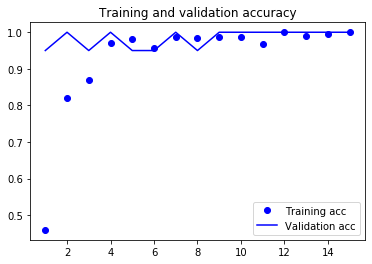

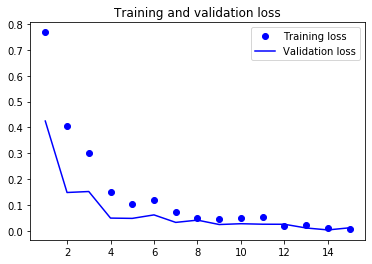

In [136]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

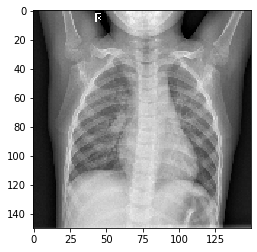

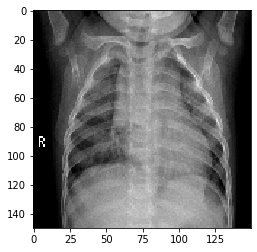

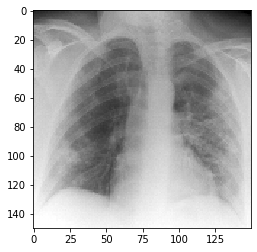

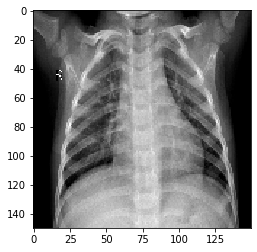

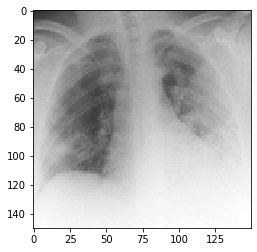

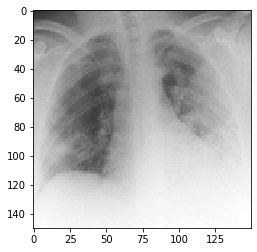

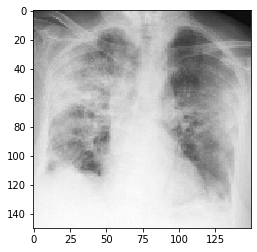

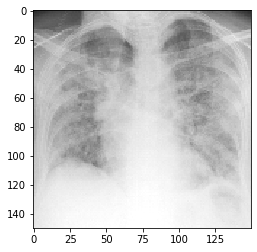

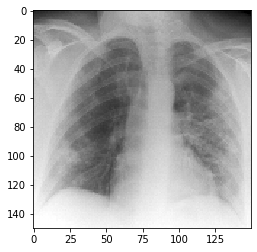

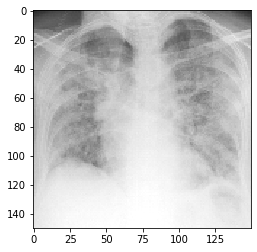

In [139]:
import math
from random import randint
predlist=[]
for i in range(10):
    img_path=f"D:/c/Desktop/PIAIC/Models/dataset/Copy of covid_data/test1/{randint(1,15)}.jpeg"
    from tensorflow.keras.preprocessing import image
    import numpy as np
    img=image.load_img(img_path,target_size=(150,150))
    img_tensor=image.img_to_array(img)
    img_tensor=np.expand_dims(img_tensor,axis=0)
    img_tensor/=255
    predlist.append(model.predict(img_tensor))
    import matplotlib.pyplot as plt
    plt.imshow(img_tensor[0])
    plt.show()

In [140]:
for pred in predlist:
    if pred>=.50:
        print('normal')
    else:
        print("corona")

normal
normal
corona
normal
corona
corona
corona
corona
corona
corona
